# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./traffic-signs-data/train.p"
validation_file = "./traffic-signs-data/valid.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_valid shape:", X_valid.shape)
print("y_valid shape:", y_valid.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34799, 32, 32, 3)
y_train shape: (34799,)
X_valid shape: (4410, 32, 32, 3)
y_valid shape: (4410,)
X_test shape: (12630, 32, 32, 3)
y_test shape: (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

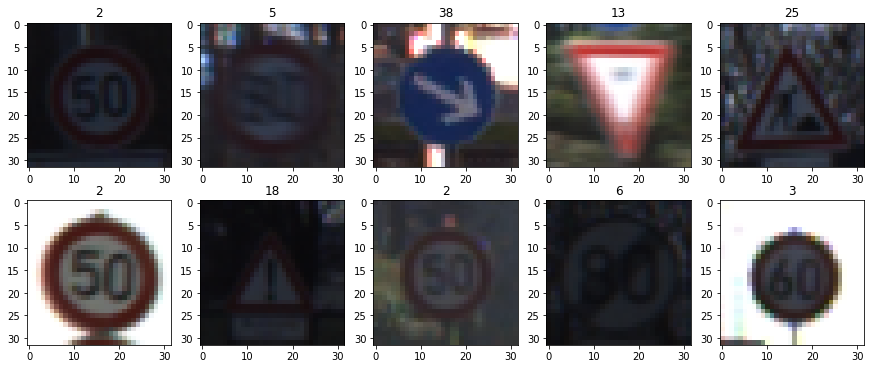

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Display 10 random images from the training set
fig, ax = plt.subplots(2, 5, figsize=(15, 6)) # 2 rows of 5 images
ax = ax.ravel()
for i in range(10):
    idx = np.random.randint(0, n_train)
    img = X_train[idx]
    ax[i].imshow(img)
    ax[i].set_title(y_train[idx])

Let's also look at the number of images of each class:

Unique classes in Training set:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]

Number of signs in each class in Training set:
[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920
  690  540  360  990 1080  180  300  270  330  450  240 1350  540  210
  480  240  390  690  210  599  360 1080  330  180 1860  270  300  210
  210]
Mean number of signs
809


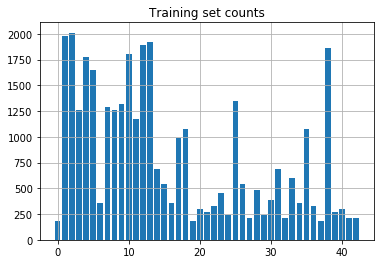

In [4]:
train_classes, train_counts = np.unique(y_train, return_counts=True)
mean_count = int(np.mean(train_counts))

print("Unique classes in Training set:")
print(train_classes)
print()
print("Number of signs in each class in Training set:")
print(train_counts)
print("Mean number of signs")
print(mean_count)

# Look at this data in a diagram
plt.bar(train_classes, train_counts)
plt.title("Training set counts")
plt.grid()
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Preprocessing will include the following elements, as extracted from the referenced paper by Pierre Sermanet and Yann LeCun:

- Conversion to Gray scale
- Normalization of pixel values to be in the range 0.1 - 0.9
- Add additional images

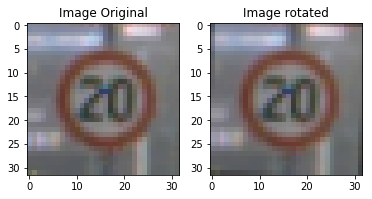

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# Write helper functions first
import cv2

# Rotate an image around its (approximate) center, with and angle in the approximate range -45 to +45 degrees

def rotate_image(img):
    center_x = int(img.shape[0]/2)
    center_y = int(img.shape[1]/2)
    angle = np.random.uniform(-45.0,45.0)
#    print(angle)
    RotMat = cv2.getRotationMatrix2D((center_x, center_y), angle, 1)
    return cv2.warpAffine(img, RotMat, img.shape[:2])

# Quick visual check of image rotation
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
title = "Image Original"
a.set_title(title)
plt.imshow(X_train[10000])

a = fig.add_subplot(1, 2, 2)
title = "Image rotated"
a.set_title(title)
plt.imshow(rotate_image(X_train[10000]))

plt.show()

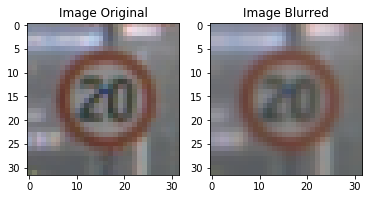

In [6]:
# Blur image using Gaussian Blur and a random kernel size between (1,1) and (5,5)

def blur_image(img):
    random_int = np.random.randint(0, 2)
    kernel_size = (2 * random_int) + 1 # Make odd number
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

# Quick visual check of blurring
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
title = "Image Original"
a.set_title(title)
plt.imshow(X_train[10000])

a = fig.add_subplot(1, 2, 2)
title = "Image Blurred"
a.set_title(title)
plt.imshow(blur_image(X_train[10000]))

plt.show()

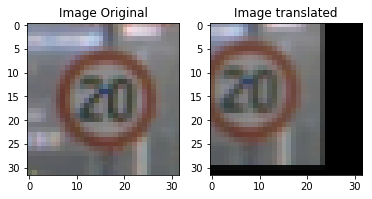

In [7]:
# Shift image in and random amount x and y direction

def translate_image(img):
    x = img.shape[0] # 32
    y = img.shape[1] # 32
    
    x_shift = np.random.uniform(-0.3 * x, 0.3 * x) # Roughly +/- 1/3 of the image size 
    y_shift = np.random.uniform(-0.3 * y, 0.3 * y)
    
    transform_matrix = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
    return cv2.warpAffine(img, transform_matrix, (x, y))

# Quick visual check of image transformation
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
title = "Image Original"
a.set_title(title)
plt.imshow(X_train[10000])

a = fig.add_subplot(1, 2, 2)
title = "Image translated"
a.set_title(title)
plt.imshow(translate_image(X_train[10000]))

plt.show()

In [8]:
# Now top of the images of each class to make sure there is at least 1000 image.

images_per_class = np.bincount(y_train)
print(images_per_class)

for i in range(len(images_per_class)):
    if(images_per_class[i] < 1000):
        additional_images = 1000 - images_per_class[i]
        additional_X = []
        additional_y = []

        images_of_class_i = np.where(y_train == i) # Get positions of all images of class i
        
        org_img = X_train[images_of_class_i][np.random.randint(0, images_per_class[i] - 1)]
        new_img = rotate_image(org_img)
        
        for j in range(int(additional_images/3)):
            org_img = X_train[images_of_class_i][np.random.randint(0, images_per_class[i] - 1)]
            new_img = rotate_image(org_img)
            additional_X.append(new_img)
            additional_y.append(i)

            org_img = X_train[images_of_class_i][np.random.randint(0, images_per_class[i] - 1)]
            new_img = blur_image(org_img)
            additional_X.append(new_img)
            additional_y.append(i)

            org_img = X_train[images_of_class_i][np.random.randint(0, images_per_class[i] - 1)]
            new_img = translate_image(org_img)
            additional_X.append(new_img)
            additional_y.append(i)
                        
        X_train = np.append(X_train, np.array(additional_X), axis=0)
        y_train = np.append(y_train, np.array(additional_y), axis=0)
        
images_per_class = np.bincount(y_train)
print(images_per_class)

[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920
  690  540  360  990 1080  180  300  270  330  450  240 1350  540  210
  480  240  390  690  210  599  360 1080  330  180 1860  270  300  210
  210]
[ 999 1980 2010 1260 1770 1650  999 1290 1260 1320 1800 1170 1890 1920
  999  999  999  999 1080  999  999  999  999  999  999 1350  999  999
  999  999  999  999  999  998  999 1080  999  999 1860  999  999  999
  999]


Unique classes in Training set:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]

Number of signs in each class in Training set:
[ 999 1980 2010 1260 1770 1650  999 1290 1260 1320 1800 1170 1890 1920
  999  999  999  999 1080  999  999  999  999  999  999 1350  999  999
  999  999  999  999  999  998  999 1080  999  999 1860  999  999  999
  999]
Mean number of signs
1201


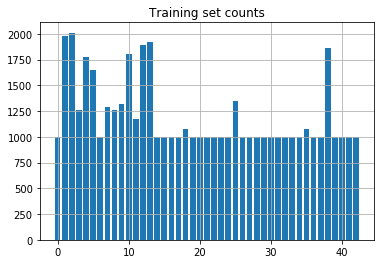

Number of training examples = 51662
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


In [9]:
# Check what came out of the image top up

train_classes, train_counts = np.unique(y_train, return_counts=True)
mean_count = int(np.mean(train_counts))

print("Unique classes in Training set:")
print(train_classes)
print()
print("Number of signs in each class in Training set:")
print(train_counts)
print("Mean number of signs")
print(mean_count)

# Look at this data in a diagram
plt.bar(train_classes, train_counts)
plt.title("Training set counts")
plt.grid()
plt.show()

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

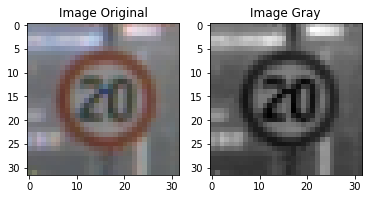

In [10]:
# Convert image to gray. Beware this conversion removes the color dimension

def convert_to_gray(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Convert a set of images to gray.
def make_them_gray(data):
    gray_images = []
    for img in data:
        gray = convert_to_gray(img)
        gray_images.append(gray)
        
    return(np.array(gray_images))
    
# Normalize value to new scale [a - b]
# Use formula: x' = a + (x - xmin)(b - a)/(xmax - xmin), where
# a = new min, b = new max, xmin = original min, xmax = original max
def normalize(data):
    return(((0.8*data)/255) + 0.1)

# Quick visual check of gray conversion
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
title = "Image Original"
a.set_title(title)
plt.imshow(X_train[10000])

a = fig.add_subplot(1, 2, 2)
title = "Image Gray"
a.set_title(title)
plt.imshow(convert_to_gray(X_train[10000]), cmap='gray')

plt.show()

In [11]:
# Now perform the conversion to gray and normalization of X_train, X_test and X_valid

X_train_gray = make_them_gray(X_train)

# Need to increase dimension by 1 as cv2 color conversion to gray removes the color axis
X_train_gray = X_train_gray[..., np.newaxis]
print(X_train_gray.shape) # Print shape to make sure we have proper dimensions to feed into LeNet
X_train_gray = normalize(X_train_gray)

# Repeat for X_test
X_test_gray = make_them_gray(X_test)
X_test_gray = X_test_gray[..., np.newaxis]
print(X_test_gray.shape)
X_test_gray = normalize(X_test_gray)

# And finally for X_valid
X_valid_gray = make_them_gray(X_valid)
X_valid_gray = X_valid_gray[..., np.newaxis]
print(X_valid_gray.shape)
X_valid_gray = normalize(X_valid_gray)

# Take over the changed images
X_train = X_train_gray
X_test = X_test_gray
X_valid = X_valid_gray

(51662, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


### Model Architecture

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

In [13]:
import tensorflow as tf

EPOCHS = 60
BATCH_SIZE = 128

### LeNet-5 Modified

This is my LeNet implementation from the LeNet-Lab modified to have 43 outputs

### Input
The LeNet architecture accepts a 32x32x1 image as input, where 1 is the number of color channels. 1 corresponds t0 grayscale.

### Architecture
**Layer 1: Convolutional.** The output shape is 28x28x6.

**Activation.** ReLU.

**Pooling.** The output shape is 14x14x6.

**Layer 2: Convolutional.** The output shape is 10x10x16.

**Activation.** ReLU.

**Pooling.** The output shape is 5x5x16.

**Flatten.** Flatten the output shape of the previous pooling layer such that it's 1D instead of 3D.

**Layer 3: Fully Connected.** This has 120 outputs.

**Activation.** ReLU.

**Layer 4: Fully Connected.** This has 84 outputs.

**Activation.** ReLU.

**Layer 5: Fully Connected (Logits).** 43 outputs corresponding to the number of classes

### Output
Return the Logits of layer 5.

In [14]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # 5x5 conv with 1x1 stride produce 28x28 from 32x32
    w_l1 = tf.Variable(tf.truncated_normal([5, 5, 1, 6], mean = mu, stddev = sigma))
    b_l1 = tf.Variable(tf.zeros(6))
    
    # Convolute weights
    conv_l1 = tf.nn.conv2d(x, w_l1, strides=[1, 1, 1, 1], padding='VALID')
    # Add bias
    conv_l1 = tf.nn.bias_add(conv_l1, b_l1)    

    # TODO: Activation.
    conv_l1 = tf.nn.relu(conv_l1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    # Pooling kernel 2x2 with stride 2x2 produces 14x14 from 28x28
    conv_l1 = tf.nn.max_pool(conv_l1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    # 5x5 conv with 1x1 stride produce 10x10 from 14x14
    w_l2 = tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean = mu, stddev = sigma))
    b_l2 = tf.Variable(tf.zeros(16))
    
    # Convolute weights
    conv_l2 = tf.nn.conv2d(conv_l1, w_l2, strides=[1, 1, 1, 1], padding='VALID')
    # Add bias
    conv_l2 = tf.nn.bias_add(conv_l2, b_l2)    

    # TODO: Activation.
    conv_l2 = tf.nn.relu(conv_l2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    # Pooling kernel 2x2 with stride 2x2 produces 5x5 from 10x10
    conv_l2 = tf.nn.max_pool(conv_l2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    flat_conv_l2 = flatten(conv_l2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    w_l3 = tf.Variable(tf.truncated_normal([400, 120], mean = mu, stddev = sigma))
    b_l3 = tf.Variable(tf.zeros([120]))
    
    l_3 = tf.add(tf.matmul(flat_conv_l2, w_l3), b_l3)

    # TODO: Activation.
    l_3 = tf.nn.relu(l_3)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    w_l4 = tf.Variable(tf.truncated_normal([120, 84], mean = mu, stddev = sigma))
    b_l4 = tf.Variable(tf.zeros([84]))
    
    l_4 = tf.add(tf.matmul(l_3, w_l4), b_l4)
    
    # TODO: Activation.
    l_4 = tf.nn.relu(l_4)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    w_l5 = tf.Variable(tf.truncated_normal([84, 43], mean = mu, stddev = sigma))
    b_l5 = tf.Variable(tf.zeros([43]))

    logits = tf.add(tf.matmul(l_4, w_l5), b_l5)
    
    # This time no non linear activation

    return logits

As an alternative LeNet architecture I implemented the one from the Sermanet/LeCunn article references in the text explaining Step 2

In [15]:
def LeNetFromArticle(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
# Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # 5x5 conv with 1x1 stride produce 28x28 from 32x32
    w_l1 = tf.Variable(tf.truncated_normal([5, 5, 1, 6], mean = mu, stddev = sigma))
    b_l1 = tf.Variable(tf.zeros(6))
    
    # Convolute weights L1
    conv_l1 = tf.nn.conv2d(x, w_l1, strides=[1, 1, 1, 1], padding='VALID')
    # Add bias L1
    conv_l1 = tf.nn.bias_add(conv_l1, b_l1)    

    # Activation L1
    conv_l1 = tf.nn.relu(conv_l1)

    # Pooling L1. Input = 28x28x6. Output = 14x14x6.
    # Pooling kernel 2x2 with stride 2x2 produces 14x14 from 28x28
    conv_l1 = tf.nn.max_pool(conv_l1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

# Layer 2: Convolutional. Output = 10x10x16.
    # 5x5 conv with 1x1 stride produce 10x10 from 14x14
    w_l2 = tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean = mu, stddev = sigma))
    b_l2 = tf.Variable(tf.zeros(16))
    
    # Convolute weights L2
    conv_l2 = tf.nn.conv2d(conv_l1, w_l2, strides=[1, 1, 1, 1], padding='VALID')
    # Add bias L2
    conv_l2 = tf.nn.bias_add(conv_l2, b_l2)    

    # Activation L2
    conv_l2 = tf.nn.relu(conv_l2)

    # Pooling L2. Input = 10x10x16. Output = 5x5x16.
    # Pooling kernel 2x2 with stride 2x2 produces 5x5 from 10x10
    conv_l2 = tf.nn.max_pool(conv_l2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    l2_raw = conv_l2
    
# Layer 3: Convolutional. Output = 1x1x400    
    w_l3 = tf.Variable(tf.truncated_normal([5, 5, 16, 400], mean = mu, stddev = sigma))
    b_l3 = tf.Variable(tf.zeros(400))

    # Convolute weights L3
    conv_l3 = tf.nn.conv2d(conv_l2, w_l3, strides=[1, 1, 1, 1], padding='VALID')
    # Add bias L3
    conv_l3 = tf.nn.bias_add(conv_l3, b_l3)    

    # Activation L3
    conv_l3 = tf.nn.relu(conv_l3)
    
# Layer 4: Add L2 output to L3 output
    l2_raw_flat = flatten(l2_raw) # input 5x5x16, output 400
    
    flat_conv_l3 = flatten(conv_l3) # input 1x1x400, output 400
    
    l4_fully_connected = tf.concat_v2([flat_conv_l3, l2_raw_flat], 1) # output 800
    
    # Dropout
    l4 = tf.nn.dropout(l4_fully_connected, keep_prob)
    
# Layer 5: Fully connected input = 800, output 43
    w_l5 = tf.Variable(tf.truncated_normal([800, 43], mean = mu, stddev = sigma))
    b_l5 = tf.Variable(tf.zeros([43]))
    
    logits = tf.add(tf.matmul(l4, w_l5), b_l5)
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [16]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

tf.reset_default_graph()

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

### Training Pipeline

In [17]:
rate = 0.0005

logits = LeNetFromArticle(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Evaluation Pipeline

In [18]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train the Model

Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.


In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        training_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.633
Validation Accuracy = 0.653

EPOCH 2 ...
Training Accuracy = 0.752
Validation Accuracy = 0.766

EPOCH 3 ...
Training Accuracy = 0.806
Validation Accuracy = 0.823

EPOCH 4 ...
Training Accuracy = 0.836
Validation Accuracy = 0.845

EPOCH 5 ...
Training Accuracy = 0.865
Validation Accuracy = 0.857

EPOCH 6 ...
Training Accuracy = 0.883
Validation Accuracy = 0.868

EPOCH 7 ...
Training Accuracy = 0.900
Validation Accuracy = 0.882

EPOCH 8 ...
Training Accuracy = 0.911
Validation Accuracy = 0.890

EPOCH 9 ...
Training Accuracy = 0.918
Validation Accuracy = 0.890

EPOCH 10 ...
Training Accuracy = 0.928
Validation Accuracy = 0.898

EPOCH 11 ...
Training Accuracy = 0.934
Validation Accuracy = 0.902

EPOCH 12 ...
Training Accuracy = 0.938
Validation Accuracy = 0.903

EPOCH 13 ...
Training Accuracy = 0.946
Validation Accuracy = 0.902

EPOCH 14 ...
Training Accuracy = 0.949
Validation Accuracy = 0.904

EPOCH 15 ...
Training Accuracy = 0.951
Valid

### Evaluate the Model

In [20]:
with tf.Session() as sess:
    saver.restore(sess, './lenet')

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.931


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

['1', '2', '3', '4', '5']


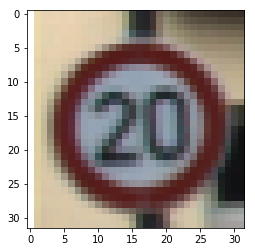

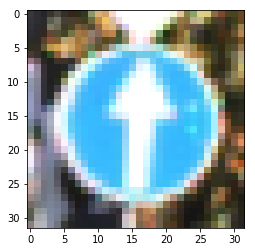

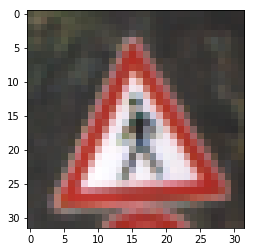

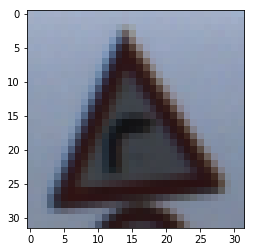

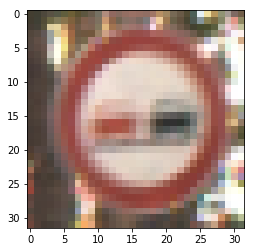

(32, 32, 3)


In [21]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
import matplotlib.image as mpimg

new_images = os.listdir("new_images/")
new_images = new_images[1:]
print(new_images) # Print array of file names

# Display the images and save the data to a list
new_image_list = []
for im in new_images:
    image = mpimg.imread('new_images/' + im)
    new_image_list.append(image[:,:,:3]) # There are 4 values per pixel, r,g,b are the first 3 
    plt.imshow(image[:,:,:3])
    plt.show()
    
print(new_image_list[0].shape)

In [22]:
# We need a numpy array with the new images
new_image_list = np.array(new_image_list)
print(new_image_list.shape)

# Now turn to gray scale and normalize as above
new_image_list = make_them_gray(new_image_list)

# As before we must increase dimension by 1 as cv2 color conversion to gray removes the color axis
new_image_list = new_image_list[..., np.newaxis]
print(new_image_list.shape) # Print shape to make sure we have proper dimensions to feed into LeNet
new_image_list = normalize(new_image_list)

(5, 32, 32, 3)
(5, 32, 32, 1)


### Predict the Sign Type for Each Image

In [31]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    new_images_predictions = sess.run(logits, feed_dict={x: new_image_list, keep_prob: 1.0})
    soft_max_values = sess.run(tf.nn.softmax(new_images_predictions))
    
print(new_images_predictions)

[[  35.61962      19.815168     -2.2068405   -11.475385     19.163353
    10.620274    -19.878796    -15.998973    -13.937628    -38.69152
   -46.396744    -56.86636     -41.560093    -38.345093    -14.257889
   -19.993774    -15.971236    -38.353886    -56.910183    -39.67459
   -39.794643    -31.528559    -44.86099     -40.29222     -19.555218
   -43.83311     -31.86239     -48.712444    -31.995846     -9.755144
   -47.796738    -21.0812      -38.45438     -30.77832     -36.31777
   -40.343132    -25.608078    -36.040092    -11.409938    -21.472328
    -2.2919517   -48.34379     -72.90262   ]
 [ -17.42843     -21.788603    -22.769474    -12.023399    -33.74737
   -29.918922    -24.586807    -41.486923    -52.564686     -8.862931
   -20.234266    -21.907541    -13.499583    -12.330773     -2.0403922
    -4.4279366   -37.774876    -22.973936    -32.221725     -8.65826
   -14.494095     -9.41213     -10.344589    -22.513447     -9.133081
   -28.333794     -2.0440946    -4.4760084   -21.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

Based on signnames.csv the 5 images correspond to ClassId 0, 35, 27, 20 and 9 respectively. Looking at the output from the neural network above you can see that it essentially lists the logits per class per image. The logits of element 0 for image 0, element 35 for image 1, element 27 for image 2, element 20 for image 3 and element 9 for image 4 are indeed the highest values, meaning that my neural network made the correct classification of all 5 images. So the accuracy is 100%.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [32]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    top_predictions = sess.run(tf.nn.top_k(new_images_predictions, k=5, sorted=True))
    
    top_soft_max_values = sess.run(tf.nn.top_k(soft_max_values, k=5, sorted=True))
    
for i in range(len(top_predictions[0])):
    print("Image " + str(i))
    print(top_predictions[0][i])
    print(top_soft_max_values[0][i])
    print(top_predictions[1][i])
    print()

Image 0
[35.61962   19.815168  19.163353  10.620274  -2.2068405]
[9.99999762e-01 1.36840043e-07 7.13071984e-08 1.38970025e-11
 3.73401670e-17]
[0 1 4 5 2]

Image 1
[29.522577   3.2078102  0.926318  -1.8230546 -2.0403922]
[1.0000000e+00 3.7294222e-12 3.8089218e-13 2.4364906e-14 1.9605442e-14]
[35 36 33 34 14]

Image 2
[45.722176  22.524273  15.514791  13.04162    7.1491427]
[1.0000000e+00 8.4193562e-11 7.6049952e-14 6.4123071e-15 1.7698843e-17]
[27 18 11 24 26]

Image 3
[18.083492    6.182893    4.7831187  -0.79051965 -1.7283148 ]
[9.9999154e-01 6.7862779e-06 1.6738544e-06 6.3550223e-09 2.4879268e-09]
[20 23 28 30 24]

Image 4
[16.213955   3.4726624  1.5099156 -2.927869  -3.3150353]
[9.9999666e-01 2.9276916e-06 4.1125890e-07 4.8619411e-09 3.3011558e-09]
[ 9 10 41 23 34]



### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")